# Linear & Quadratic discriminant analysis

En este cuaderno probamos dos clasificadores basados en distribuciones normales de los cuales podemos calcular una fórmula cerrada para la superficie de decisión: LDA y QDA. Son dos clasificadores clásicos que funcionan bien cuando hay muy poca muestra.

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2021, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2021, URJC (Spain)

    alfredo.cuesta@urjc.es

### Preliminares 

En la siguiente celda se realizan los siguientes pasos:
1. carga de módulos genéricos
2. leer los datos y cargarlos en dataframes
2. extraer características
2. separar en TRAIN y VALID
2. seleccionar características y escalar TRAIN a [0,1]

In [1]:
#-[1]. Load data from CSV and put all in a single dataframe 'FullSet'

import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('../MyUtils/')
import MyUtils as my
seed = 1234 #<- random generator seed (comment to get randomness)

#-[2]. Load data from CSV and put all in a single dataframe 'FullSet'

FullSet_0 = pd.read_csv('../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../Datasets/1000unos.csv',  header=None)
FullSet = my.join_features_labels(FullSet_0,FullSet_1)

#-[3]. Convert the 'FullSet' of pixels into the set 'X_full' of features and get the set 'Y_full' of labels

theta = 0.5
X_full = my.mnist_features( FullSet.drop('label', axis=1), theta=theta )
Y_full = FullSet[['label']]

#-[4]. Split X_full into TRAIN and TEST in a single Stratified split

valid_size = 0.2
X_train, Y_train, X_valid, Y_valid = \
   my.single_stratified_split( X_full,Y_full, test_size=valid_size, random_state=seed)

#-[5]. Select the features and fit a scaler to [0,1]

from sklearn.preprocessing import MinMaxScaler

feat_selec= ['W_max1','height']
scaler = MinMaxScaler()
X = scaler.fit_transform(X_train[feat_selec])
Y = Y_train.values.ravel()   

#---> X and Y are now numpy arrays ready to train a machine !!

## LDA / QDA

Más en [*Linear and Quadratic Discriminant Analysis*, de Scikit-Learn](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)

#### Entrenar

In [2]:
#-[6]. Learn a LDA or QDA 

classifier = 'QDA'

if classifier == 'QDA':
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    clf = QuadraticDiscriminantAnalysis(store_covariance=True)
elif classifier == 'LDA':
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    clf = LinearDiscriminantAnalysis(store_covariance=True)
else: 
    print('Choose either QDA or LDA')

clf.fit(X, Y)


QuadraticDiscriminantAnalysis(store_covariance=True)

#### Predecir

In [3]:
#--parameters of this cell
Ngrid = 100

#--take Ngrid x Ngrid equally spaced points in [0,1]x[0,1]
rangeX = np.linspace(0,1,Ngrid)
rangeY = np.linspace(0,1,Ngrid)
xx,yy = np.meshgrid(rangeX,rangeY)
grid_data = np.hstack( (xx.reshape([xx.size,1]),    \
                        yy.reshape([yy.size,1]) ) )

#--predict the label 
y_pred = clf.predict( grid_data )

#### Visualizar

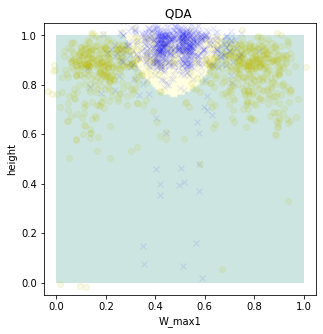

In [4]:
#--parameters of this cell
unit_interv = [0,1,0,1]
origin = 'lower'
plt.rcParams['figure.figsize'] = [5,5] #<- this makes the figures larger in Jupyter

cmap = 'summer' # other choices are: 'jet' 'hot' 'cool' 'spring' 'summer' 'winter'
plt.imshow(y_pred.reshape([Ngrid,Ngrid]), origin="lower", extent=unit_interv, cmap=cmap, alpha=0.2)
plt.xlabel(feat_selec[0]);plt.ylabel(feat_selec[1]);

#--plot the training set
sigma = 0.02

ix1 = Y>0
ix0 = ~ix1
x1_zeros = my.jitter(X[ix0,0],sigma=sigma)
x2_zeros = my.jitter(X[ix0,1],sigma=sigma)
x1_ones = my.jitter(X[ix1,0],sigma=sigma)
x2_ones = my.jitter(X[ix1,1],sigma=sigma)
plt.plot(x1_zeros, x2_zeros, 'yo', alpha=.1)
plt.plot(x1_ones, x2_ones, 'bx', alpha=.1)

strTitle = "%s "%classifier
plt.title(strTitle)
plt.axis([-0.05,1.05,-0.05,1.05])


plt.show()